## **BANK LOAN DATA ANALYSIS**

#### **Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px

#### **Import Data**

In [2]:
df = pd.read_excel("E:/Bank Loan Project/Bank Loan Project/financial_loan_data_excel.xlsx")
print(df.head())

        id address_state application_type emp_length              emp_title  \
0  1077430            GA       INDIVIDUAL   < 1 year                  Ryder   
1  1072053            CA       INDIVIDUAL    9 years         MKC Accounting   
2  1069243            CA       INDIVIDUAL    4 years  Chemat Technology Inc   
3  1041756            TX       INDIVIDUAL   < 1 year    barnes distribution   
4  1068350            IL       INDIVIDUAL  10+ years          J&J Steel Inc   

  grade home_ownership issue_date last_credit_pull_date last_payment_date  \
0     C           RENT 2021-02-11            2021-09-13        2021-04-13   
1     E           RENT 2021-01-01            2021-12-14        2021-01-15   
2     C           RENT 2021-01-05            2021-12-12        2021-01-09   
3     B       MORTGAGE 2021-02-25            2021-12-12        2021-03-12   
4     A       MORTGAGE 2021-01-01            2021-12-14        2021-01-15   

   ... sub_grade        term  verification_status annual_incom

#### **Metadata of Data**

In [3]:
print("Number of rows in the DataFrame:", df.shape[0])
print("Number of columns in the DataFrame:", df.shape[1])

Number of rows in the DataFrame: 38576
Number of columns in the DataFrame: 24


#### **Data Types**

In [4]:
df.dtypes

id                                int64
address_state                    object
application_type                 object
emp_length                       object
emp_title                        object
grade                            object
home_ownership                   object
issue_date               datetime64[ns]
last_credit_pull_date    datetime64[ns]
last_payment_date        datetime64[ns]
loan_status                      object
next_payment_date        datetime64[ns]
member_id                         int64
purpose                          object
sub_grade                        object
term                             object
verification_status              object
annual_income                   float64
dti                             float64
installment                     float64
int_rate                        float64
loan_amount                       int64
total_acc                         int64
total_payment                     int64
dtype: object

In [5]:
df.describe()

,id,issue_date,last_credit_pull_date,last_payment_date,next_payment_date,member_id,annual_income,dti,installment,int_rate,loan_amount,total_acc,total_payment
count,3.857600e+04,38576,38576,38576,38576,3.857600e+04,3.857600e+04,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000,38576.000000
mean,6.810371e+05,2021-07-16 02:31:35.562007040,2021-06-08 13:36:34.193280512,2021-06-26 09:52:08.909166080,2021-07-26 20:42:20.605557760,8.476515e+05,6.964454e+04,0.133274,326.862965,0.120488,11296.066855,22.132544,12263.348533
min,5.473400e+04,2021-01-01 00:00:00,2021-01-08 00:00:00,2021-01-08 00:00:00,2021-02-08 00:00:00,7.069900e+04,4.000000e+03,0.000000,15.690000,0.054200,500.000000,2.000000,34.000000
25%,5.135170e+05,2021-04-11 00:00:00,2021-04-15 00:00:00,2021-03-16 00:00:00,2021-04-16 00:00:00,6.629788e+05,4.150000e+04,0.082100,168.450000,0.093200,5500.000000,14.000000,5633.000000
50%,6.627280e+05,2021-07-11 00:00:00,2021-05-16 00:00:00,2021-06-14 00:00:00,2021-07-14 00:00:00,8.473565e+05,6.000000e+04,0.134200,283.045000,0.118600,10000.000000,20.000000,10042.000000
75%,8.365060e+05,2021-10-11 00:00:00,2021-08-13 00:00:00,2021-09-15 00:00:00,2021-10-15 00:00:00,1.045652e+06,8.320050e+04,0.185900,434.442500,0.145900,15000.000000,29.000000,16658.000000
max,1.077501e+06,2021-12-12 00:00:00,2022-01-20 00:00:00,2021-12-15 00:00:00,2022-01-15 00:00:00,1.314167e+06,6.000000e+06,0.299900,1305.190000,0.245900,35000.000000,90.000000,58564.000000
std,2.113246e+05,NaN,NaN,NaN,NaN,2.668105e+05,6.429368e+04,0.066662,209.092000,0.037164,7460.746022,11.392282,9051.104777


#### **Total Loan Applications**

In [6]:
total_loan_applications = df['id'].count()
print("Total number of loan applications:", total_loan_applications)

Total number of loan applications: 38576


#### **MTD Total Loan Applications**

In [7]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_loan_applications = mtd_data['id'].count()

print(f"MTD Loan Applications(for {latest_issue_date.strftime('%B %Y')}): {mtd_loan_applications}")

MTD Loan Applications(for December 2021): 4314


#### **Total Funded Amount**

In [8]:
total_funded_amount = df['loan_amount'].sum()
total_funded_amount_millions = total_funded_amount / 1000000
print("Total Funded Amount: ${:,.2f}M".format(total_funded_amount_millions))

Total Funded Amount: $435.76M


#### **MTD Total Funded Amount**

In [9]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_funded_amount = mtd_data['loan_amount'].sum()
mtd_total_funded_amount_millions = mtd_total_funded_amount / 1000000
print("MTD Total Funded Amount(for {} {}): ${:,.2f}M".format(latest_issue_date.strftime('%B'), latest_year, mtd_total_funded_amount_millions))

MTD Total Funded Amount(for December 2021): $53.98M


#### **Total Amount Received**

In [10]:
total_amount_received = df['total_payment'].sum()
total_amount_received_millions = total_amount_received / 1000000
print("Total Amount Received: ${:,.2f}M".format(total_amount_received_millions))

Total Amount Received: $473.07M


#### **MTD Total Amount Received**

In [11]:
latest_issue_date = df['issue_date'].max()
latest_year = latest_issue_date.year
latest_month = latest_issue_date.month

mtd_data = df[(df['issue_date'].dt.year == latest_year) & (df['issue_date'].dt.month == latest_month)]

mtd_total_amount_received = mtd_data['total_payment'].sum()
mtd_total_amount_received_millions = mtd_total_amount_received / 1000000
print("MTD Total Amount Received(for {} {}): ${:,.2f}M".format(latest_issue_date.strftime('%B'), latest_year, mtd_total_amount_received_millions))

MTD Total Amount Received(for December 2021): $58.07M


#### **Average Interest Rate**

In [12]:
average_interest_rate = df['int_rate'].mean() * 100
print("Average Interest Rate: {:.2f}%".format(average_interest_rate))

Average Interest Rate: 12.05%


#### **Average Debt-to-Income Ratio DTI**

In [13]:
average_dti = df['dti'].mean() * 100
print("Average Debt-to-Income Ratio(DTI): {:.2f}%".format(average_dti))

Average Debt-to-Income Ratio(DTI): 13.33%


#### **Good Loan Metrics**

In [14]:
good_loans = df[df['loan_status'].isin(["Fully Paid", "Current"])]

total_loan_applications = df['id'].count()

good_loan_applications = good_loans['id'].count()
good_loan_funded_amount = good_loans['loan_amount'].sum()
good_loan_received = good_loans['total_payment'].sum()

good_loan_funded_amount_millions = good_loan_funded_amount / 1000000
good_loan_received_millions = good_loan_received / 1000000

good_loan_percentage = (good_loan_applications / total_loan_applications) * 100

print("Good Loan Applications:", good_loan_applications)
print("Good Loan Funded Amount(in Millions): ${:,.2f}M".format(good_loan_funded_amount_millions))
print("Good Loan Total Received(in Millions): ${:,.2f}M".format(good_loan_received_millions))
print("Percentage of Good Loan Applications: {:.2f}%" .format (good_loan_percentage))


Good Loan Applications: 33243
Good Loan Funded Amount(in Millions): $370.22M
Good Loan Total Received(in Millions): $435.79M
Percentage of Good Loan Applications: 86.18%


#### **Bad Loan Metrics**

In [15]:
bad_loans = df[df['loan_status'].isin(["Charged Off"])]

total_loan_applications = df['id'].count()

bad_loan_applications = bad_loans['id'].count()
bad_loan_funded_amount = bad_loans['loan_amount'].sum()
bad_loan_received = bad_loans['total_payment'].sum()

bad_loan_funded_amount_millions = bad_loan_funded_amount / 1000000
bad_loan_received_millions = bad_loan_received / 1000000

bad_loan_percentage = (bad_loan_applications / total_loan_applications) * 100

print("Bad Loan Applications:", bad_loan_applications)
print("Bad Loan Funded Amount(in Millions): ${:,.2f}M".format(bad_loan_funded_amount_millions))
print("Bad Loan Total Received(in Millions): ${:,.2f}M".format(bad_loan_received_millions))
print("Percentage of Bad Loan Applications: {:.2f}%" .format (bad_loan_percentage))

Bad Loan Applications: 5333
Bad Loan Funded Amount(in Millions): $65.53M
Bad Loan Total Received(in Millions): $37.28M
Percentage of Bad Loan Applications: 13.82%


#### **Monthly Trends by Issue Date for Total Funded Amount**

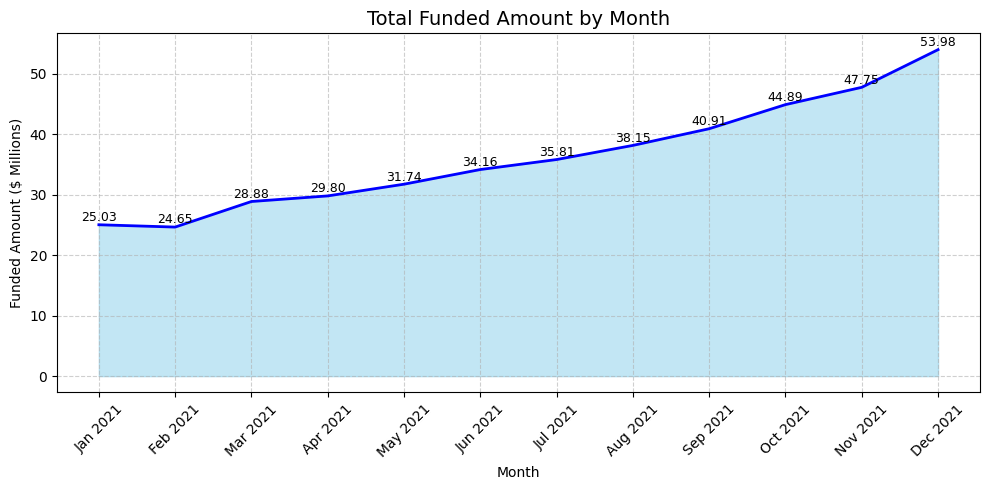

In [16]:
monthly_funded = (
     df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
     .groupby('month_name', sort=False)['loan_amount']
     .sum()
     .div(1000000)
     .reset_index(name='loan_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='skyblue', alpha=0.5)
plt.plot(monthly_funded['month_name'], monthly_funded['loan_amount_millions'], color='blue', linewidth=2)

for i, row in monthly_funded.iterrows():
    plt.text(i, row['loan_amount_millions'] + 0.1, f"{row['loan_amount_millions']:.2f}",
              ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Funded Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Funded Amount ($ Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### **Monthly Trends for Total Amount Received**

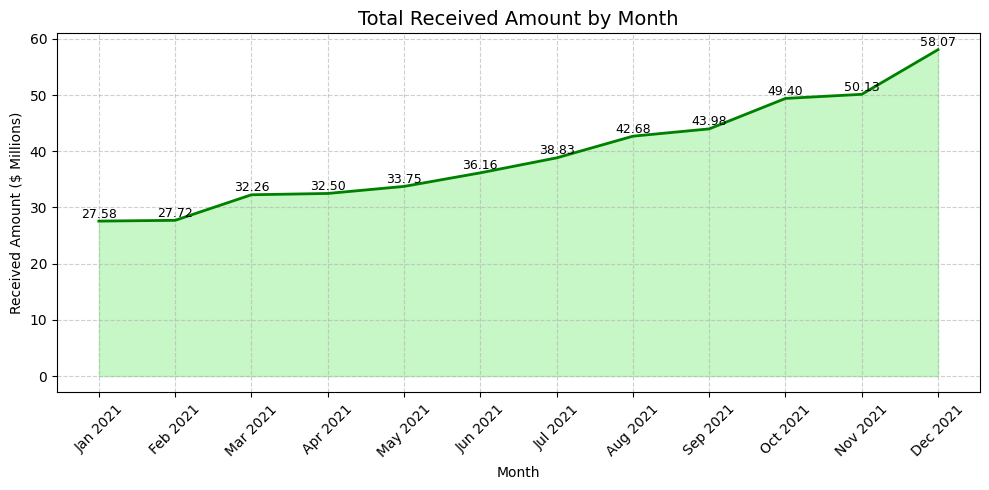

In [17]:
monthly_received = (
     df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
     .groupby('month_name', sort=False)['total_payment']
     .sum()
     .div(1000000)
     .reset_index(name='received_amount_millions')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_received['month_name'], monthly_received['received_amount_millions'], color='lightgreen', alpha=0.5)
plt.plot(monthly_received['month_name'], monthly_received['received_amount_millions'], color='green', linewidth=2)

for i, row in monthly_received.iterrows():
    plt.text(i, row['received_amount_millions'] + 0.1, f"{row['received_amount_millions']:.2f}",
              ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Received Amount by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Received Amount ($ Millions)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### **Monthly Trends for Total Loan Applications**

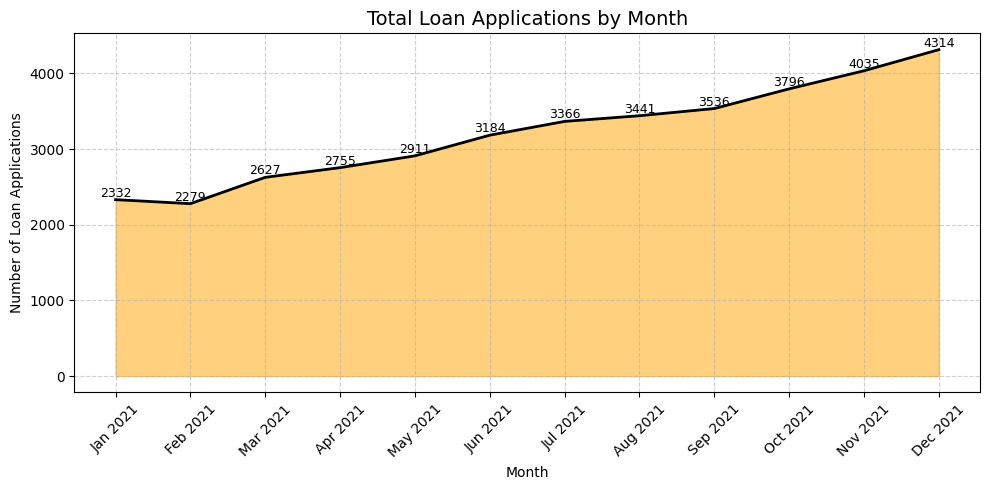

In [18]:
monthly_applications = (
     df.sort_values('issue_date')
     .assign(month_name=lambda x: x['issue_date'].dt.strftime('%b %Y'))
     .groupby('month_name', sort=False)['id']
     .count()
     .reset_index(name='loan_applications_count')
)

plt.figure(figsize=(10, 5))
plt.fill_between(monthly_applications['month_name'], monthly_applications['loan_applications_count'], color='orange', alpha=0.5)
plt.plot(monthly_applications['month_name'], monthly_applications['loan_applications_count'], color='black', linewidth=2)

for i, row in monthly_applications.iterrows():
    plt.text(i, row['loan_applications_count'] + 0.5, f"{row['loan_applications_count']}",
              ha='center', va='bottom', fontsize=9, rotation=0, color='black')

plt.title('Total Loan Applications by Month', fontsize=14)
plt.xlabel('Month')
plt.ylabel('Number of Loan Applications')
plt.xticks(ticks=range(len(monthly_applications)), labels=monthly_applications['month_name'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### **Regional Analysis by State for Total Funded Amount**

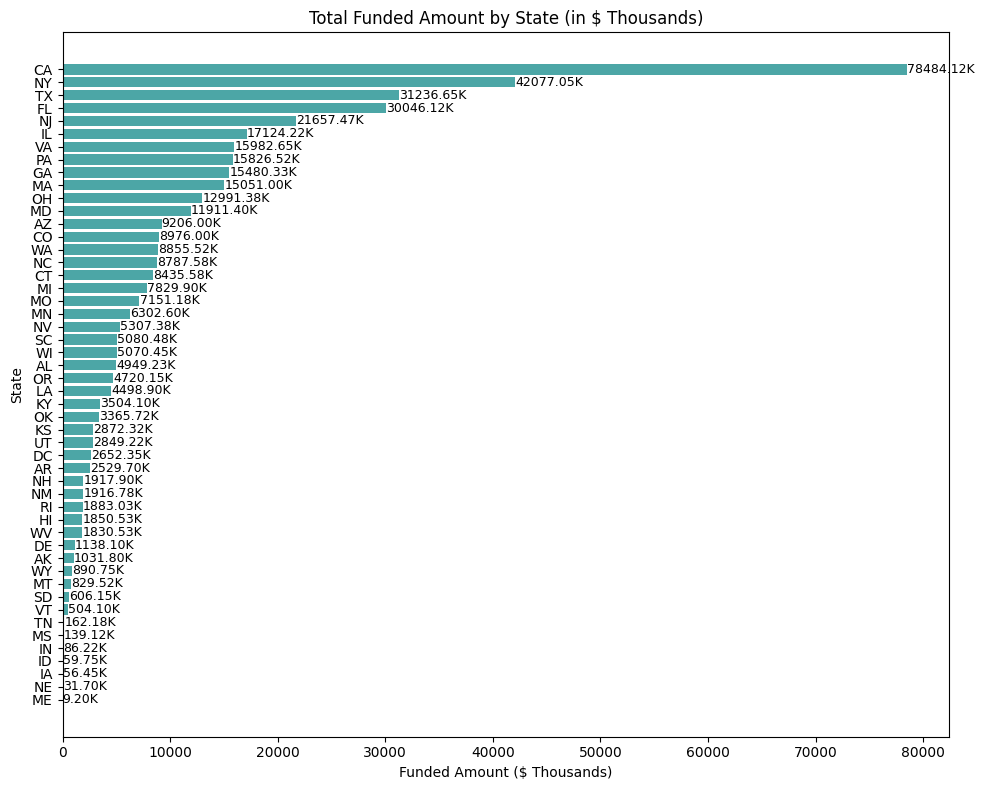

In [19]:
state_funding = df.groupby('address_state')['loan_amount'].sum().sort_values(ascending=True)
state_funding_thousands = state_funding / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_funding_thousands.index, state_funding_thousands.values, color ='teal', alpha=0.7)

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.2f}K', va='center', fontsize=9)

plt.title('Total Funded Amount by State (in $ Thousands)')
plt.xlabel('Funded Amount ($ Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()


#### **Regional Analysis by State for Total Amount Received**

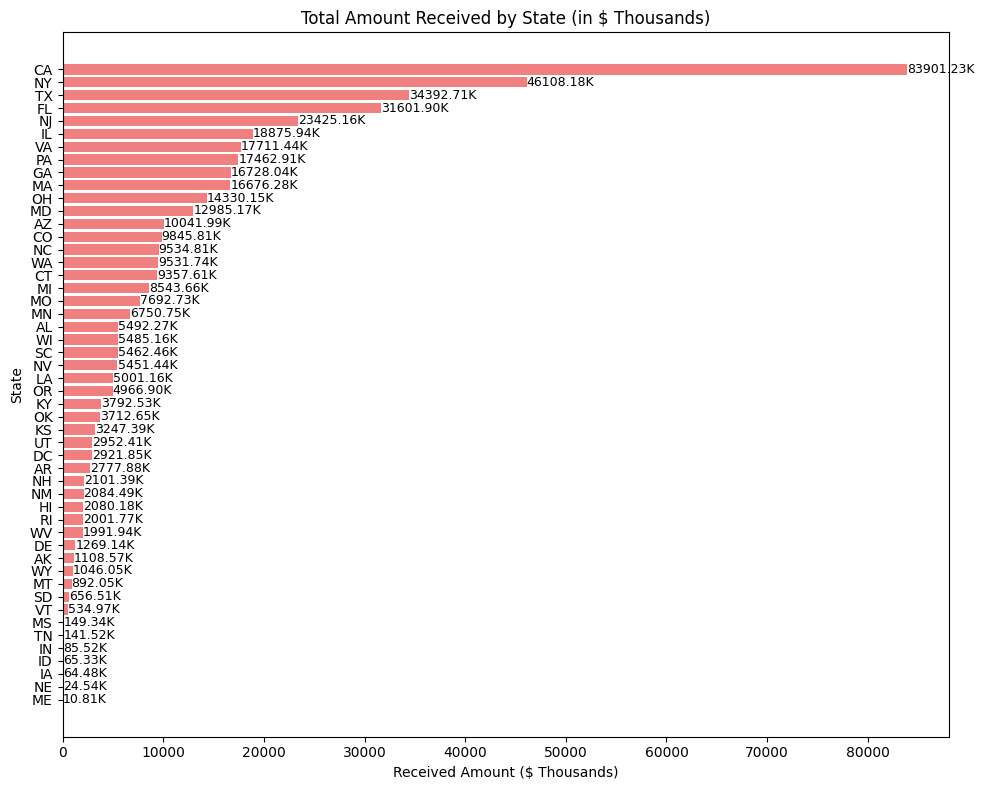

In [34]:
state_received_amount = df.groupby('address_state')['total_payment'].sum().sort_values(ascending=True)
state_received_amount_thousands = state_received_amount / 1000

plt.figure(figsize=(10, 8))
bars = plt.barh(state_received_amount_thousands.index, state_received_amount_thousands.values, color ='lightcoral')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.2f}K', va='center', fontsize=9)

plt.title('Total Amount Received by State (in $ Thousands)')
plt.xlabel('Received Amount ($ Thousands)')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#### **Regional Analysis by State for Total Loan Applications**

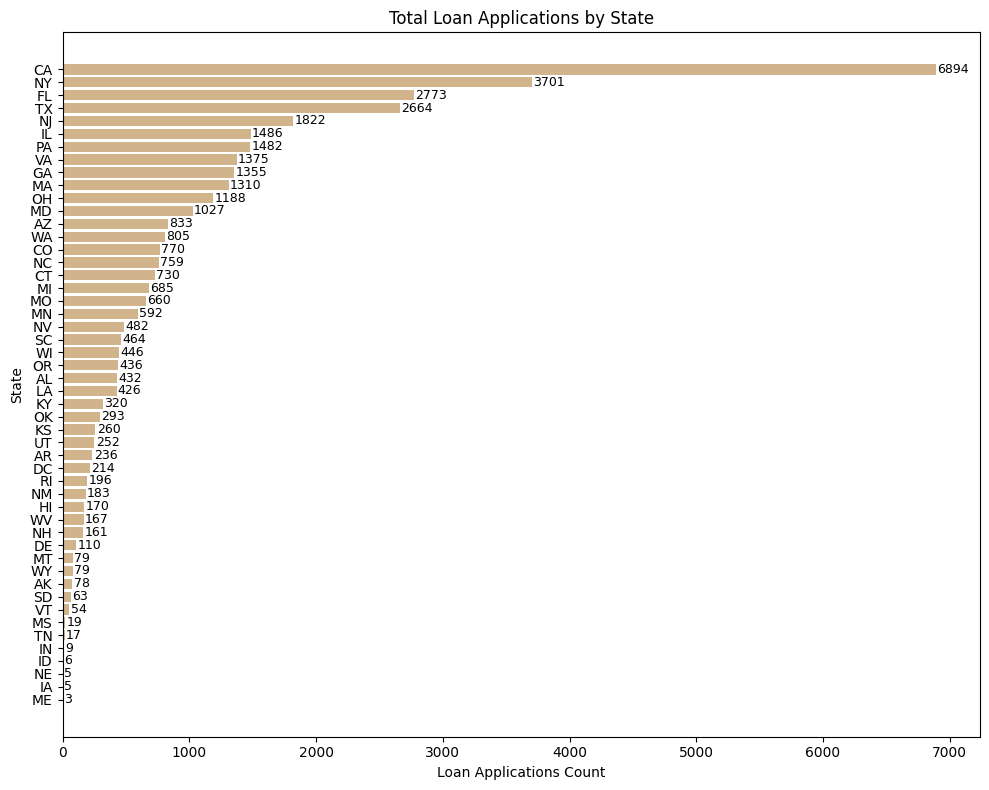

In [21]:
state_loan_applications = df.groupby('address_state')['id'].count().sort_values(ascending=True)

plt.figure(figsize=(10, 8))
bars = plt.barh(state_loan_applications.index, state_loan_applications.values, color ='tan')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 10, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', va='center', fontsize=9)

plt.title('Total Loan Applications by State')
plt.xlabel('Loan Applications Count')
plt.ylabel('State')
plt.tight_layout()
plt.show()

#### **Loan Term Analysis by Total Funded Amount**

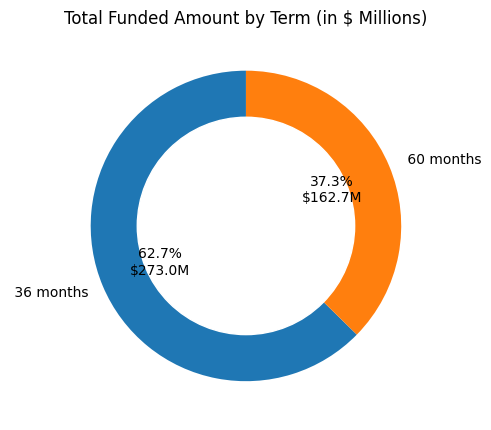

In [22]:
term_funding_millions = df.groupby('term')['loan_amount'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_funding_millions,
    labels=term_funding_millions.index,
    autopct=lambda p: f'{p:.1f}%\n${p*sum(term_funding_millions)/100:.1f}M',
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Funded Amount by Term (in $ Millions)")
plt.tight_layout()
plt.show()

#### **Loan Term Analysis by Total Received Amount**

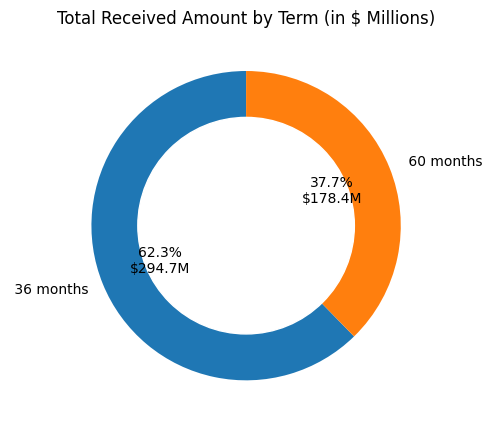

In [23]:
term_received_amount_millions = df.groupby('term')['total_payment'].sum() / 1000000

plt.figure(figsize=(5, 5))
plt.pie(
    term_received_amount_millions,
    labels=term_received_amount_millions.index,
    autopct=lambda p: f'{p:.1f}%\n${p*sum(term_received_amount_millions)/100:.1f}M',
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Received Amount by Term (in $ Millions)")
plt.tight_layout()
plt.show()

#### **Loan Term Analysis by Total Loan Applications**

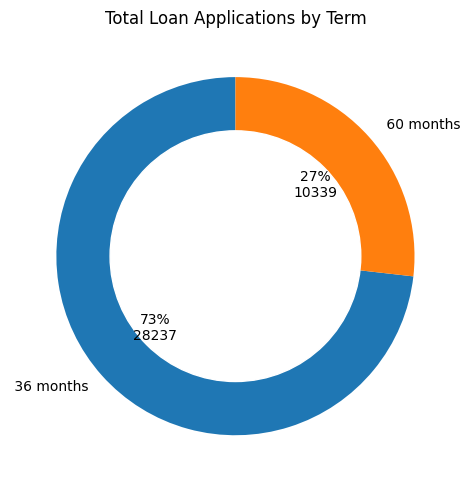

In [24]:
term_loan_applications = df.groupby('term')['id'].count()

plt.figure(figsize=(5, 5))
plt.pie(
    term_loan_applications,
    labels=term_loan_applications.index,
    autopct=lambda p: f'{p:.0f}%\n{p*sum(term_loan_applications)/100:.0f}',
    startangle=90,
    wedgeprops={'width': 0.4}
)
plt.gca().add_artist(plt.Circle((0, 0), 0.70, color='white'))
plt.title("Total Loan Applications by Term")
plt.tight_layout()
plt.show()

#### **Employee Length by Total Funded Amount**

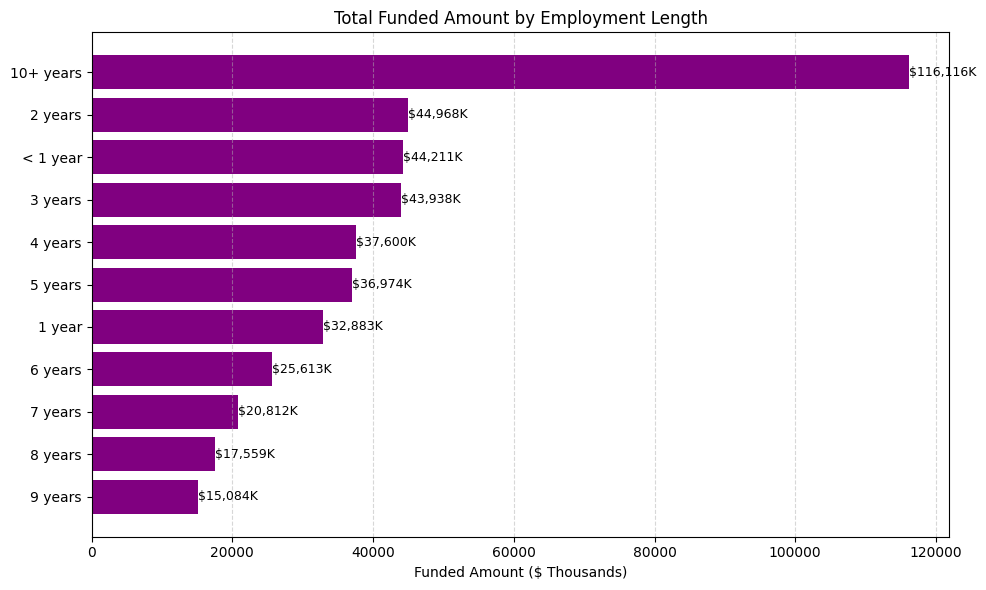

In [25]:
emp_funding = df.groupby('emp_length')['loan_amount'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_funding.index, emp_funding.values, color='purple')

for bar in bars:
     width = bar.get_width()
     plt.text(width + 5, bar.get_y() + bar.get_height()/2, f"${width:,.0f}K", va='center', fontsize=9)

plt.xlabel("Funded Amount ($ Thousands)")
plt.title("Total Funded Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Employee Length by Total Received Amount**

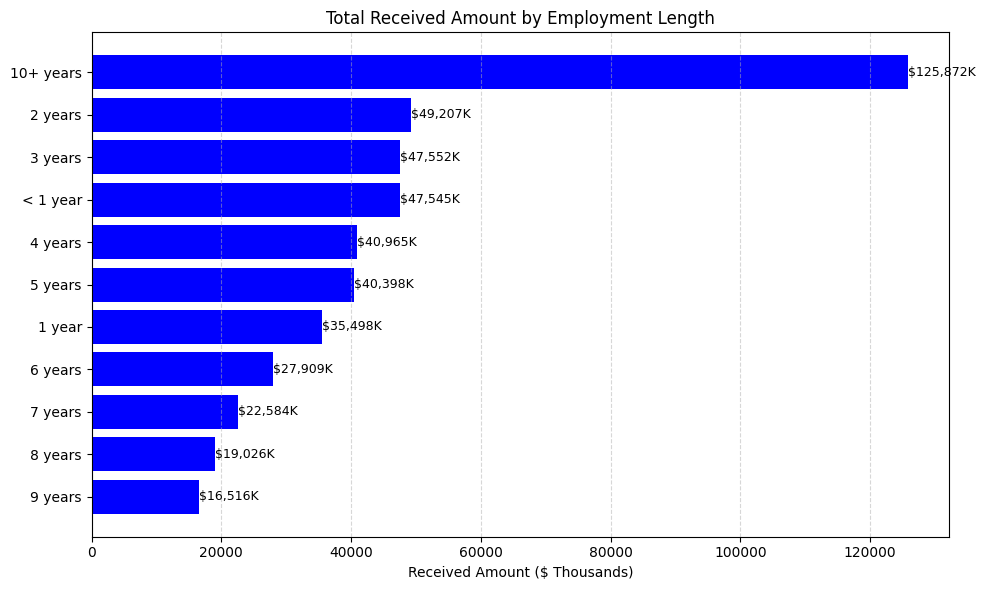

In [26]:
emp_received_amount = df.groupby('emp_length')['total_payment'].sum().sort_values()/1000

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_received_amount.index, emp_received_amount.values, color='blue')

for bar in bars:
     width = bar.get_width()
     plt.text(width + 5, bar.get_y() + bar.get_height()/2, f"${width:,.0f}K", va='center', fontsize=9)

plt.xlabel("Received Amount ($ Thousands)")
plt.title("Total Received Amount by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Employee Length by Total Loan Applicaions**

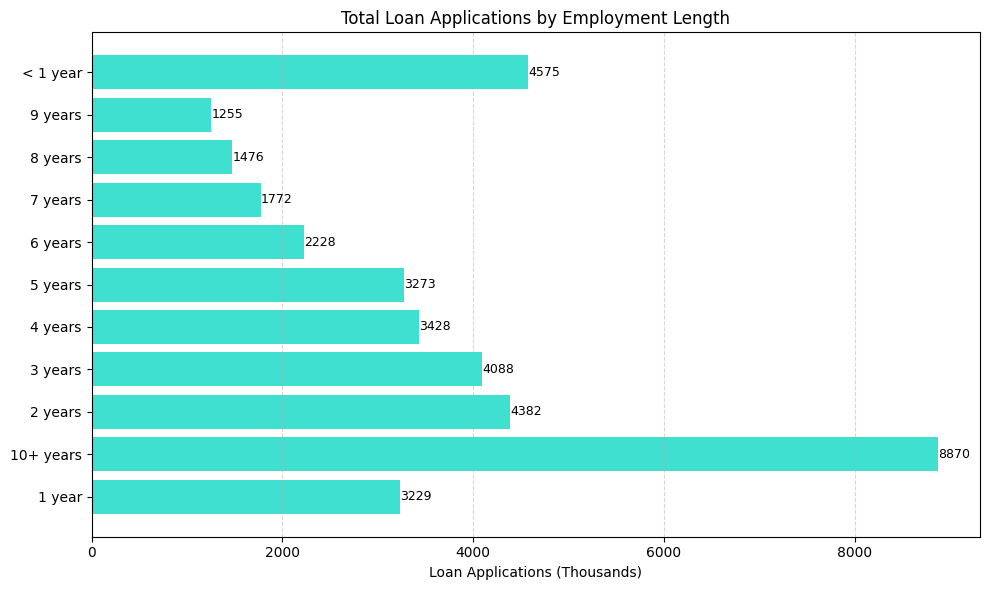

In [35]:
emp_loan_applications = df.groupby('emp_length')['id'].count()

plt.figure(figsize=(10, 6))
bars = plt.barh(emp_loan_applications.index, emp_loan_applications.values, color='turquoise')

for bar in bars:
     width = bar.get_width()
     plt.text(width + 5, bar.get_y() + bar.get_height()/2, f"{width:.0f}", va='center', fontsize=9)

plt.xlabel("Loan Applications (Thousands)")
plt.title("Total Loan Applications by Employment Length")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### **Loan Purpose by Total Funded Amount**

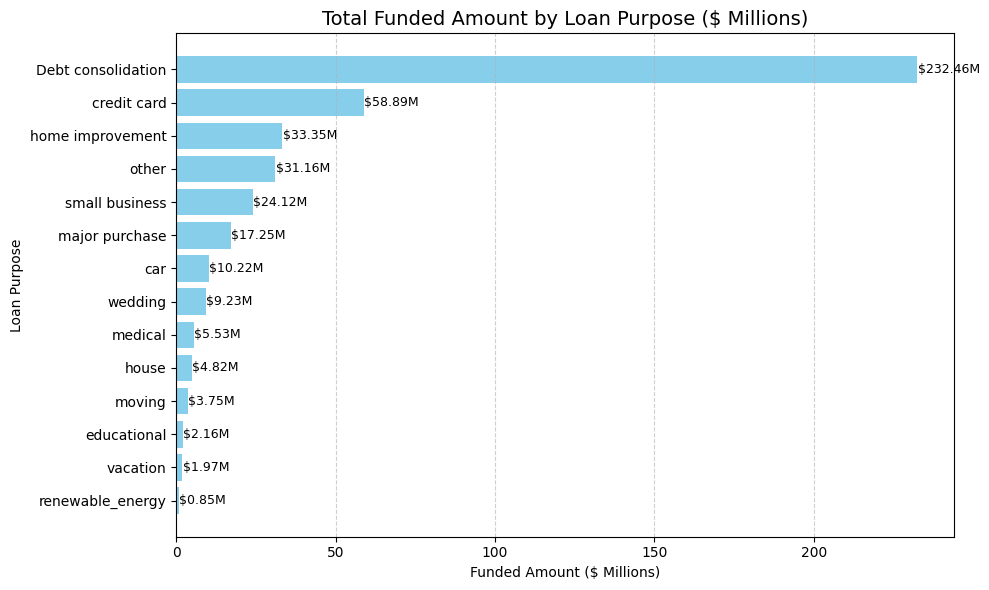

In [28]:
purpose_funding_millions = (df.groupby('purpose')['loan_amount'].sum().sort_values()/1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_funding_millions.index, purpose_funding_millions.values, color='skyblue')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'${width:.2f}M', va='center', fontsize=9)
    
plt.title('Total Funded Amount by Loan Purpose ($ Millions)', fontsize=14)
plt.xlabel('Funded Amount ($ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


#### **Loan Purpose by Total Received Amount**

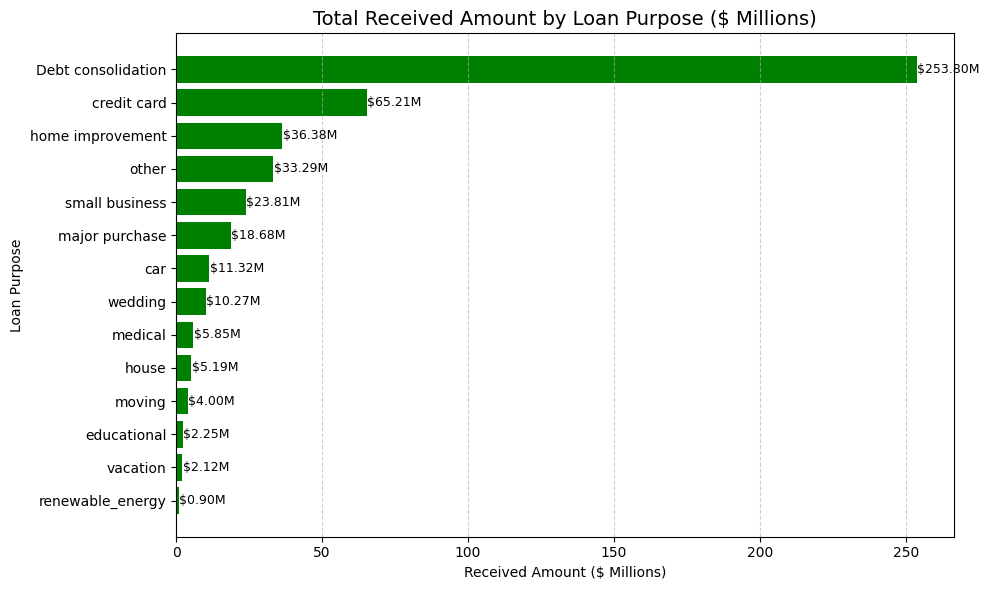

In [29]:
purpose_received_amount_millions = (df.groupby('purpose')['total_payment'].sum().sort_values()/1000000)

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_received_amount_millions.index, purpose_received_amount_millions.values, color='green')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'${width:.2f}M', va='center', fontsize=9)
    
plt.title('Total Received Amount by Loan Purpose ($ Millions)', fontsize=14)
plt.xlabel('Received Amount ($ Millions)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Loan Purpose by Total Loan Applications**

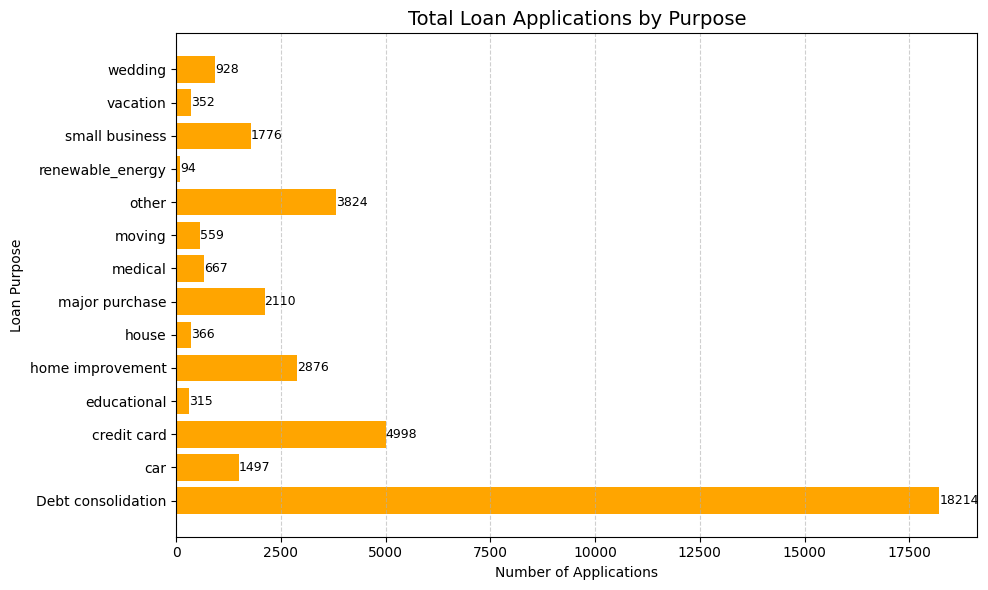

In [30]:
purpose_loan_applications = (df.groupby('purpose')['id'].count())

plt.figure(figsize=(10, 6))
bars = plt.barh(purpose_loan_applications.index, purpose_loan_applications.values, color='orange')

for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.0f}', va='center', fontsize=9)

plt.title('Total Loan Applications by Purpose', fontsize=14)
plt.xlabel('Number of Applications')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### **Home Ownership by Total Funded Amount**

In [31]:
home_funding = df.groupby("home_ownership")['loan_amount'].sum().reset_index()
home_funding['loan_amount_millions'] = home_funding['loan_amount'] / 1000000

fig = px.treemap(
    home_funding,
    path=['home_ownership'],
    values='loan_amount_millions',
    color='loan_amount_millions',
    color_continuous_scale='Blues',
    title='Total Funded Amount by Home Ownership ($ Millions)'
)

fig.show()

#### **Home Ownership by Total Received Amount**

In [32]:
home_received_amount = df.groupby("home_ownership")['total_payment'].sum().reset_index()
home_received_amount['total_payment_millions'] = home_received_amount['total_payment'] / 1000000

fig = px.treemap(
    home_received_amount,
    path=['home_ownership'],
    values='total_payment_millions',
    color='total_payment_millions',
    color_continuous_scale='greens',
    title='Total Received Amount by Home Ownership ($ Millions)'
)

fig.show()

#### **Home Ownership by Total Loan Applications**

In [33]:
home_loan_applications = df.groupby("home_ownership")['id'].count().reset_index()

fig = px.treemap(
    home_loan_applications,
    path=['home_ownership'],
    values='id',
    color='id',
    title='Total Loan Applications by Home Ownership'
)

fig.show()